In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
from scipy import fftpack

In [62]:
path= '/home/hcapettini/Escritorio/HDD1TB/Tesis/Analísis/Mayo/'             
#path = '/media/adminpc/Hilario-2/Tesis/Analísis/Mayo/'

simulacion='pulso_4' 
#simulacion='desequilibrio_3' 

pathr=path+simulacion+'/'+simulacion

#Tiempo a analizar
tmin =0
tmax =500
varstr='dens'

In [63]:
radio= 3.e8;
largo= 25.e8;

c=2;                #ancho EN celdas por ejemplo cada 5 celdas Xcinco celdas hay un punto el ancho es 5
dc=0.1e8;           #Este es el ancho de cada celda de acuerdo al refinamiento
space = c * dc;
x0=space/2.;         #Indicar el punto inical el x
y0=5.e8 +space/2.; #Indicar el punto inical el y
#ymax=30.e8
nx=int(radio/(c*dc));
ny=int(largo/(c*dc));

In [64]:
ny

125

In [65]:
pos='_'+str(x0/1.e8)+ '_'+str(y0/1.e8)+ '_'
with open(pathr +pos+ varstr+'.txt') as var:
    varlines = var.readlines()[:]
    time  = [float(line.split()[0]) for line in varlines]

nt=len(time)
variable=np.zeros((ny, nx,nt))

In [66]:
for j in range (0,ny):  
    for i in range (0,nx):
        x=x0 +i*space
        y=y0 +j*space
        pos='_'+str(x/1.e8)+ '_'+str(y/1.e8)+ '_'
        with open(pathr +pos+ varstr+'.txt') as var:
            varlines = var.readlines()[:]
            varx = [float(line.split()[1]) for line in varlines]
        variablen = np.array(varx)
        
        
        variable[j,i,:]=variablen

In [67]:
#plt.plot(time,variable[0,0,:])
#plt.xlim(0., 0.2)
variable.shape

(125, 15, 1001)

In [69]:
t = 0
xmin =0.e8
xmax =3.e8
ymin =0.e8
ymax =25.e8

nxmin=int(xmin/space)
nxmax=int(xmax/space)
nymin=int(ymin/space)
nymax=int(ymax/space)

dt=(tmax-tmin)/nt
n=int(t/dt)
rango=((xmin)/1.e8,xmax/1.e8,(ymin+5.e8)/1.e8,(ymax+5.e8)/1.e8)

In [70]:
print(nxmin,nxmax,nymin,nymax)

0 15 0 125


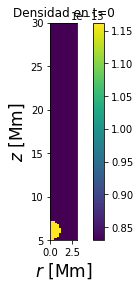

In [71]:
plt.imshow(variable[nymin:nymax,nxmin:nxmax,n], cmap='viridis', extent=rango,origin='lower')
plt.title('Densidad en t='+str(t))
plt.ylabel(r'${z}$ [Mm]',fontsize=17)  
plt.xlabel(r'${r}$ [Mm]',fontsize=17)
plt.colorbar()
#plt.clim(0.85e-13,1.15e-13)
plt.show()


In [45]:
t0=0.5
t1=4
t2=30

xmin =0.e8
xmax =3.e8
ymin =0.5e8
ymax =25.e8








nxmin=int(xmin/space)
nxmax=int(xmax/space)
nymin=int(ymin/space)
nymax=int(ymax/space)

rango=((xmin)/1.e8,xmax/1.e8,(ymin+5.e8)/1.e8,(ymax+5.e8)/1.e8)

n0=int(t0/dt)
d0=variable[nymin:nymax,nxmin:nxmax,n0]
d0min=np.amin(d0)
d0max=np.amax(d0)

n1=int(t1/dt)
d1=variable[nymin:nymax,nxmin:nxmax,n1]
d1min=np.amin(d1)
d1max=np.amax(d1)

n2=int(t2/dt)
d2=variable[nymin:nymax,nxmin:nxmax,n2]
d2min=np.amin(d2)
d2max=np.amax(d2)

colorbarmin =min(d0min,d1min,d2min)
colorbarmax =max(d0max,d1max,d2max)

/home/hcapettini/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  app.launch_new_instance()


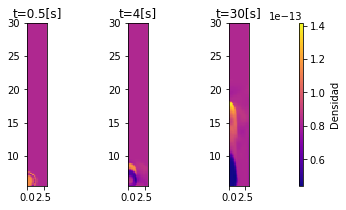

In [46]:
fig, (ax0, ax1, ax2, cax) = plt.subplots(ncols=4,figsize=(5.5,3), 
                  gridspec_kw={"width_ratios":[1,1,1, 0.05]})
fig.subplots_adjust(wspace=0.3)
im0  = ax0.imshow(d0, cmap='plasma', extent=rango,origin='lower', vmin=colorbarmin,vmax=colorbarmax)
ax0.title.set_text('t='+str(t0)+ '[s]')

im1 = ax1.imshow(d1, cmap='plasma', extent=rango,origin='lower', vmin=colorbarmin,vmax=colorbarmax)
ax1.title.set_text('t='+str(t1)+ '[s]')

im2 = ax2.imshow(d2, cmap='plasma', extent=rango,origin='lower', vmin=colorbarmin,vmax=colorbarmax)
ax2.title.set_text('t='+str(t2)+ '[s]')

cbar=fig.colorbar(im2, cax=cax, label='Densidad')


cbar.set_clim(0, 0.5)

plt.show()

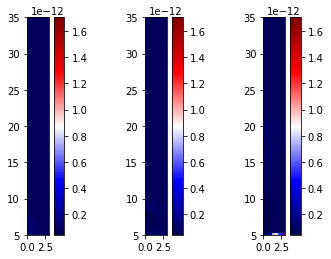

In [26]:

fig,ax = plt.subplots(1,3)

im = ax[0].imshow(d0, cmap='seismic', extent=rango,origin='lower', vmin=colorbarmin,vmax=colorbarmax)
fig.colorbar(im,ax=ax[0])

im2 = ax[1].imshow(d1, cmap='seismic', extent=rango,origin='lower', vmin=colorbarmin,vmax=colorbarmax)
plt.colorbar(im2,ax=ax[1])

im3 = ax[2].imshow(d2, cmap='seismic', extent=rango,origin='lower', vmin=colorbarmin,vmax=colorbarmax)
plt.colorbar(im3,ax=ax[2])

plt.show()